In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.05
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

def sigmoid(x):
    """
    Compute the sigmoid of x
    Arguments:
    x -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure


np.random.seed(1) # set a seed so that the results are consistent


In [29]:
X, Y = load_planar_dataset()

In [30]:
print(f"X shape : {X.shape}") 
print(f"Y shape : {Y.shape}")

X shape : (2, 400)
Y shape : (1, 400)


## train test split

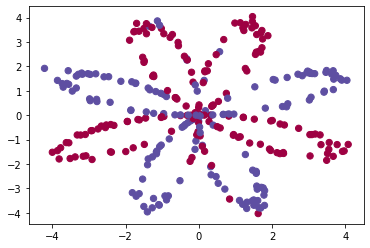

In [34]:
plt.scatter(X_train[0,:], X_train[1,:], c=Y_train[0], s=40, cmap=plt.cm.Spectral)

In [35]:
# train test split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X.T, Y.T, test_size=0.1, shuffle=True)
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"Y_train shape : {Y_train.shape}")

X_train shape : (360, 2)
X_test shape : (40, 2)
Y_train shape : (360, 1)


In [32]:
print(f"X_train shape : {X_train.shape}") 
print(f"X_test shape : {X_test.shape}")
print(f"Y_train shape : {Y_train.shape}")
print(f"Y_test shape : {Y_test.shape}")

X_train shape : (2, 320)
X_test shape : (2, 80)
Y_train shape : (1, 320)
Y_test shape : (1, 80)


In [38]:
# normalized inputs 

X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

In [40]:
X_train = X_train.T 
X_test = X_test.T

print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")

Y_train = Y_train.T
Y_test = Y_test.T

print(f"Y_train shape : {Y_train.shape}")
print(f"Y_test shape : {Y_test.shape}")

X_train shape : (2, 360)
X_test shape : (2, 40)
Y_train shape : (1, 360)
Y_test shape : (1, 40)


## Building the L layer neural network

In [73]:
def sigmoid(Z): 
    '''
        apply the sigmoid function on Z 
        output : 
            s : Z: -> sigmoid(Z)
            cache : a tuple containing the parameter Z
    '''
    
    s = 1 / (1+np.exp(-Z))
    cache = (Z,)
    
    return s, cache 


def linear(A, W, b): 
    '''
        return the linear operation 
        output : 
            s : the linear operation 
            cache : all parameters used for the computation inside a tuple
    '''
    
    assert W.shape[1] == A.shape[0] 
    assert b.shape[0] == W.shape[0]
    
    s = W.dot(A) + b
    cache = (A, W, b) 
    
    return s, cache


def relu(Z): 
    '''
        return the relu operation
        output : 
            s : the relu operation 
            cache : Z inside a tuple
    '''
    
    s = np.maximum(Z, 0) 
    cache = (Z,)
    return s, cache 

def relu_derivative(Z): 
    '''
        return the derivative of the relu function 
        output : 
            A : the derivative of the relu function 
    '''
    A = Z.copy()
    A[A > 0] = 1 
    A[A <= 0] = 0
    
    return A


def compute_cost(A, Y): 
    '''
        return the computation of the cost function 
    '''
    assert A.shape == Y.shape
    m = A.shape[1] 
    return (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    

In [88]:
def initialize_parameters(X, nb_neurones): 
    '''
        return a dictionary containing all initialized parameters for all layers 
        ouput : 
            the dictionary of parameters
    '''
    parameters = {} 
    
    # get number of samples 
    m = X.shape[1]
    # get number of layers 
    l = len(nb_neurones)
    
    for i in range(l): 
        # init using the He method
        print(f"Initializing for layer : {i}")
        if i == 0: 
            W = np.random.randn(nb_neurones[i], X.shape[0]) * np.sqrt(2/nb_neurones[i])
        else: 
            W = np.random.randn(nb_neurones[i], parameters[f"W{i}"].shape[0]) * np.sqrt(2/nb_neurones[i])
    
        b = np.random.randn(nb_neurones[i], 1) * 0.01
        parameters[f"W{i+1}"] = W 
        parameters[f"b{i+1}"] = b
        
    print("Successfully initialized parameters for the entire network")
        
    return parameters

In [89]:
# testing 
d = initialize_parameters(X, [20, 10, 1])
for param in d: 
    print(f"Shape for {param} : {d[param].shape}")

Initializing for layer : 0
Initializing for layer : 1
Initializing for layer : 2
Successfully initialized parameters for the entire network
Shape for W1 : (20, 2)
Shape for b1 : (20, 1)
Shape for W2 : (10, 20)
Shape for b2 : (10, 1)
Shape for W3 : (1, 10)
Shape for b3 : (1, 1)


In [144]:
def forward_pass(X, parameters, Y): 
    '''
        Entire forward propagation across all layers of the network
        output : 
            grads : a dictionnary of all gradients 
            cache : a dictionnary of all parameters used
    '''
    l = len(parameters) // 2 
    grads = {}
    all_cache = {}
    
    A = X
    all_cache["A0"] = A
    for i in range(l): 
        W = parameters[f"W{i+1}"] 
        b = parameters[f"b{i+1}"] 
        
        if i != l-1: 
            # use the relu activation 
            Z, cache = linear(A, W, b)
            
            all_cache[f"W{i+1}"] = W
            all_cache[f"b{i+1}"] = b 
            
            #activation 
            A, cache = relu(Z)
            all_cache[f"Z{i+1}"] = Z 
            all_cache[f"A{i+1}"] = A

        
        else: 
            # last layer has to use the sigmoid activation 
            Z, cache = linear(A, W, b)     
            
            
            all_cache[f"W{i+1}"] = W
            all_cache[f"b{i+1}"] = b 

            # activation 
            A, cache = sigmoid(Z)
            all_cache[f"Z{i+1}"] = Z 
            all_cache[f"A{i+1}"] = A
        
    
    # compute cost
    cost = compute_cost(A, Y) 
    return cost, all_cache


In [151]:
def backward_pass(parameters, cache, Y, l):
    '''
        return all gradients 
        output : 
            grads : a dictionary containing all gradients
    '''
    m = Y.shape[1]
    grads = {} 

    for i in reversed(range(l)): 
        if i == l-1: 
            dZ = cache[f"A{i+1}"] - Y
        else: 
            dZ = cache[f"W{i+2}"].T.dot(dZ) * relu_derivative(cache[f"Z{i+1}"]) 
        
        dW = (1/m) * dZ.dot(cache[f"A{i}"].T)
        db = (1/m) * np.sum(dZ, keepdims=True, axis=1)

        # save gradients 
        grads[f"dZ{i+1}"] = dZ
        grads[f"dW{i+1}"] = dW 
        grads[f"db{i+1}"] = db
            
    return grads
    

In [152]:
# d = initialize_parameters(X_train, [20, 50, 1]) 
# _, cache = forward_pass(X_train, d, Y_train)
# grads = backward_pass(d, cache, Y_train, 3)

In [157]:
def update_parameters(parameters, grads, learning_rate): 
    for param in parameters:
        # takes a long time but do it once ! 
        assert parameters[param].shape == grads[f"d{param}"].shape
        parameters[param] = parameters[param] - learning_rate * grads[f"d{param}"]
    
    return parameters

In [158]:
def l_nn(X, Y, nb_neurones, learning_rate, epochs): 
    
    # init parameters 
    parameters = initialize_parameters(X, nb_neurones)
    cost_history = []
    for epoch in range(epochs): 
        # forward pass
        cost, cache = forward_pass(X, parameters, Y) 
        cost_history.append(cost)
        if epoch % 100 == 0: 
            print(f"Cost value at {epoch} : {cost}")
        # backward propagation 
        grads = backward_pass(parameters, cache, Y, len(nb_neurones))
        prameters = update_parameters(parameters, grads, learning_rate)
            
    plt.plot(range(epochs), cost_history) 
    return plt.show()

In [ ]:
l_nn(X_train, Y_train, [30, 20, 1], 0.01, 10000)

Initializing for layer : 0
Initializing for layer : 1
Initializing for layer : 2
Successfully initialized parameters for the entire network
Cost value at 0 : 1.0647053563278002
Cost value at 100 : 0.5279564828723067
Cost value at 200 : 0.47570289427166407
Cost value at 300 : 0.45397529034090045
Cost value at 400 : 0.4396037012864288
Cost value at 500 : 0.42868864456576844
Cost value at 600 : 0.41945541492427535
Cost value at 700 : 0.4117632189625411
Cost value at 800 : 0.4049528545968815
Cost value at 900 : 0.39886266071924914
Cost value at 1000 : 0.39330035967936144
Cost value at 1100 : 0.3883567306733897
Cost value at 1200 : 0.3839981114129447
Cost value at 1300 : 0.37988876898609736
Cost value at 1400 : 0.37612915248749945
Cost value at 1500 : 0.3725540258332474
Cost value at 1600 : 0.3692220447209798


In [156]:
X_train.shape

(2, 360)